In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Mounting the drive where i have placed the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Unzip the zipped file

In [0]:
!unzip -q "/content/drive/My Drive/DevanagariHandwrittenCharacterDataset.zip"

Dataset will be available at [DHCH dataset]( (https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset ).

It’s a dataset similar to MNIST, but for Devanagari(देवनागरी) characters instead.

The dataset is not as well known and/or used, so was fun to try it out, and got pretty good results (error rate : 3.87% | accuracy : 96.13%) for less than 2 hours of tinkering.

# **Working starts below**

In [0]:
# necessary imports 
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [16]:
!ls DevanagariHandwrittenCharacterDataset

models	test  train


## As we see the name of directories is Train and Test and we want names
## As train and test so that fastai can work

In [0]:
!mv DevanagariHandwrittenCharacterDataset/Train DevanagariHandwrittenCharacterDataset/train
!mv DevanagariHandwrittenCharacterDataset/Test DevanagariHandwrittenCharacterDataset/test

In [0]:
!ls DevanagariHandwrittenCharacterDataset

test  train


## All set we renamed the folders

In [0]:
path='DevanagariHandwrittenCharacterDataset'

In [0]:
tfms=get_transforms(do_flip=0)
data=ImageDataBunch.from_folder(path,valid_pct=0.25,ds_tfms=tfms,size=32)

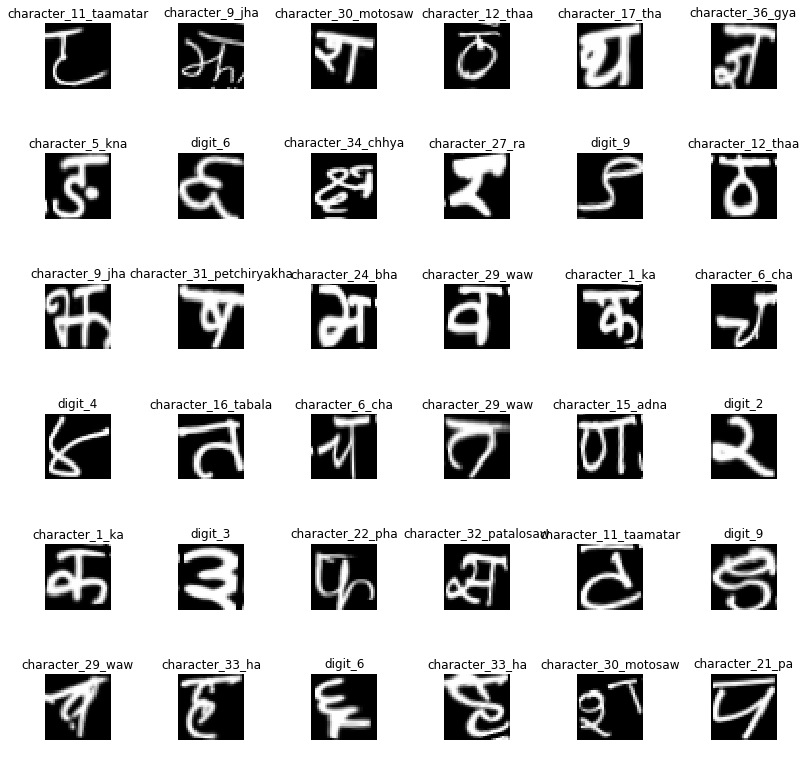

In [18]:
data.show_batch(rows=6, figsize=(11,11))# random batch of images


In [19]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)# creating model using transfer learning
# using Resnet50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 47385024.90it/s]


In [20]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.256574,1.793011,0.507565,01:54
1,1.212684,0.776710,0.767435,01:51
2,0.630049,0.336749,0.893783,01:51
3,0.383877,0.182734,0.942217,01:49
4,0.308015,0.124715,0.961957,01:48
5,0.239618,0.093218,0.971478,01:48
6,0.183377,0.078384,0.975043,01:48
7,0.155137,0.070357,0.979130,01:47
8,0.144832,0.066244,0.980000,01:48
9,0.130526,0.066697,0.979652,01:47


In [0]:
learn.save('devanagari-model')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


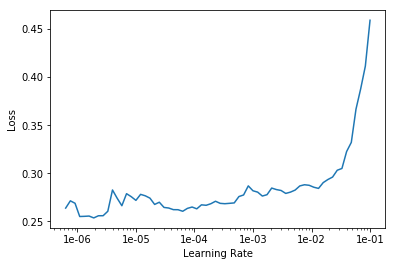

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(8,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.257809,0.131380,0.960000,01:42
1,0.274000,0.129578,0.960435,01:42
2,0.272417,0.123467,0.961348,01:43
3,0.258734,0.125271,0.960609,01:42
4,0.256743,0.126869,0.960696,01:41
5,0.272869,0.127705,0.960783,01:42


## Unfreezing and Fine tuning

In [0]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.136165,0.059494,0.981174,02:02
1,0.103050,0.049695,0.983696,01:59
2,0.103802,0.047148,0.984957,01:58


## I think overfitting will come nto picture but look we got an accuracy of 98.4 % :)